### Understanding correlation function by visualizing random distributions of data

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
from astropy.table import Table

In [3]:
def random_points(seed, area, target_density, figure=False):
    """Generate random points on a grid defined by the parameters. 
            
    Parameters
    ----------
    seed : int
    
    area : float
        area on the sky square degrees
    
    target_density : int
        number of targets per square degree
        
    figure : boolean
        whether to plot the distribution (default = False)
        
    Returns
    -------
    points : ndarray
        array of shape (area*target_density, area*target_density) containing randomly generated points
    """
    
    
    #generate a random state from which to draw  a distribution
    gen = random.RandomState(seed)
    num = area*target_density
    side = np.floor(np.sqrt(area))
    points = gen.rand(2, num)*side
    
    if figure:
        fig = plt.figure(figsize=(6,6))
        plt.scatter(points[0], points[1], lw=0, alpha=0.3)
        plt.xlim(0,side)
        plt.ylim(0,side)
        plt.show()
    
    return points

In [4]:
#generate random distributions based on a given seed
seed123 = random_points(seed=123, area=100, target_density=50)
seed456 = random_points(seed=456, area=100, target_density=50)
seed789 = random_points(seed=789, area=100, target_density=50)
seed999 = random_points(seed=999, area=100, target_density=50)

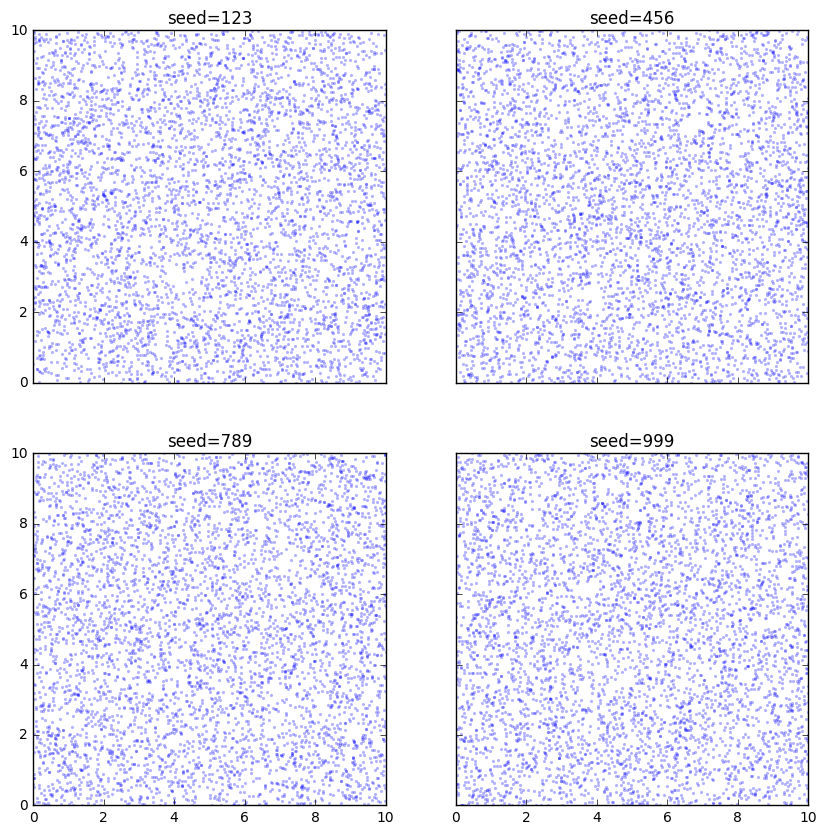

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))
ax1.scatter(seed123[0], seed123[1], lw=0, alpha=0.3, s=5)
ax1.set_title('seed=123')
ax1.set_ylim(0,10)
ax2.scatter(seed456[0], seed456[1], lw=0, alpha=0.3, s=5)
ax2.set_title('seed=456')
ax3.scatter(seed789[0], seed789[1], lw=0, alpha=0.3, s=5)
ax3.set_title('seed=789')
ax3.set_xlim(0,10)
ax3.set_ylim(0,10)
ax4.scatter(seed999[0], seed999[1], lw=0, alpha=0.3, s=5)
ax4.set_title('seed=999')
ax4.set_xlim(0,10)
plt.show()

In [12]:
def dist(p1, p2):
#Calculate the absolute distance between a pair of points in two-dimensions.

    dx = np.abs(p1[0]-p2[0])
    dy = np.abs(p1[1]-p2[1])
    return np.sqrt(dx**2+dy**2)

def relative_separation(points):
#Calculate the relative separation between an array of pairs of points.
    separations = []
    for i, p1 in enumerate(points):
        for j, p2 in enumerate(points):
            if i!=j:
                separations.append(dist(p1, p2))
    return separations

In [7]:
points123 = list(zip(seed123[0], seed123[1]))
separations123 = relative_separation(points123)

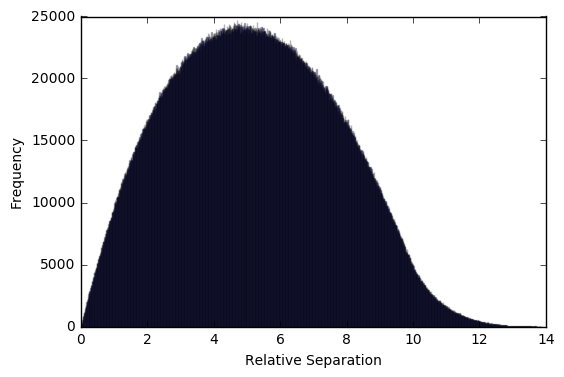

In [8]:
plt.hist(separations123, alpha=0.3, bins=2000)
plt.xlabel('Relative Separation')
plt.ylabel('Frequency')
plt.show()

In [9]:
start_time = time.time()
points456 = list(zip(seed456[0], seed456[1]))
separations456 = relative_separation(points456)
print("--- {:f} seconds ---".format(time.time() - start_time))

--- 66.683050 seconds ---


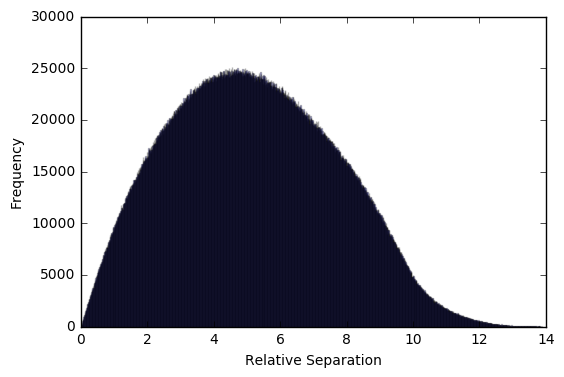

In [16]:
plt.hist(separations456, alpha=0.3, bins=2000)
plt.xlabel('Relative Separation')
plt.ylabel('Frequency')
plt.show()

## Import LRG data

In [6]:
lrg = Table.read('data/LRG_0.9_1.0.fits')
data = Table([lrg['RA'], lrg['DEC']])

In [7]:
#large range for dec...
print(np.min(data['DEC']), np.max(data['DEC']))
print(np.min(data['RA']), np.max(data['RA']))

-89.95262146 89.9273452759
1.60149629664e-05 359.999633789


In [8]:
def keep_range(data, ra_min, ra_max, dec_min, dec_max):
    keep = ((ra_min<data['RA']) & (data['RA']<ra_max) & (dec_min<data['DEC']) & (data['DEC']<dec_max))
    return data[keep]

### First patch of LRG footprint `cut1`

In [9]:
ra_min, ra_max, dec_min, dec_max = 100, 110, 40, 50
cut1 = keep_range(data, ra_min, ra_max, dec_min, dec_max)

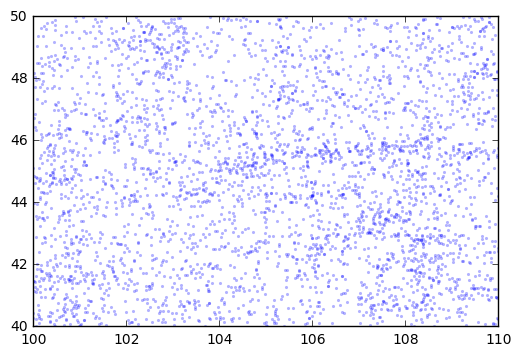

In [10]:
plt.scatter(cut1['RA'], cut1['DEC'], lw=0, alpha=0.3, s=5)
plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)
plt.show()

In [13]:
#can we assume distances to be linear if separation is only 10 degrees in ra and dec?
lrg_sep1 = relative_separation(cut1)

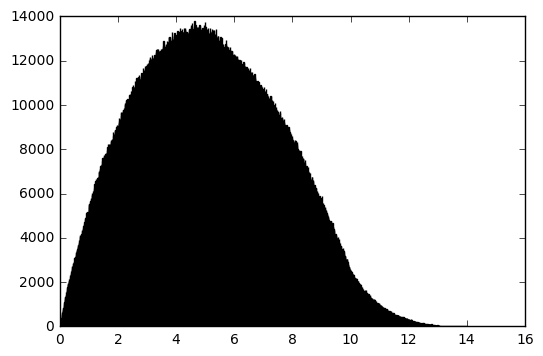

In [14]:
freq, sep, _ = plt.hist(lrg_sep1, bins=2000, range=(0,14))

### Random realization of LRG footprint based on target density based of `cut1` 

/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


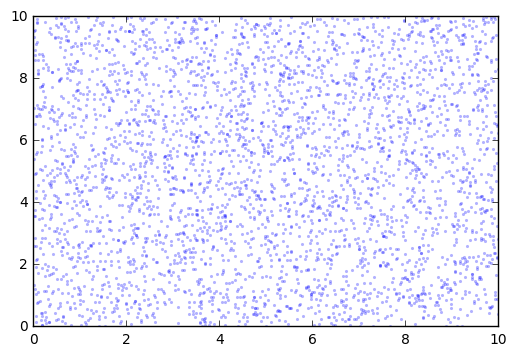

In [16]:
seed_cut1 = random_points(seed=114, area=100, target_density=len(cut1)/float(100))
plt.scatter(seed_cut1[0], seed_cut1[1], lw=0, alpha=0.3, s=5)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

In [17]:
points_seed_cut1 = list(zip(seed_cut1[0], seed_cut1[1]))
separations_seed_cut1 = relative_separation(points_seed_cut1)

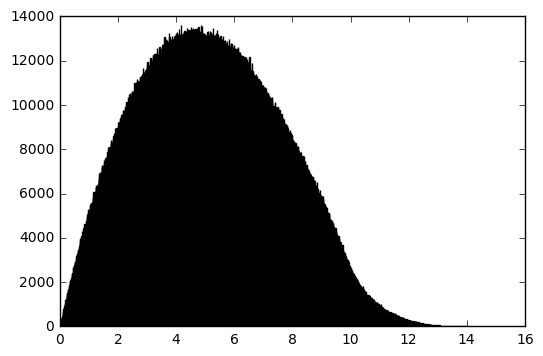

In [18]:
freq_seed, sep_seed, _seed = plt.hist(separations_seed_cut1, bins=2000, range=(0,14))

#### Example of a different 100 sq deg patch of LRG footprint

In [22]:
ra_min, ra_max, dec_min, dec_max = 200, 210, 40, 50
cut2 = keep_range(data, ra_min, ra_max, dec_min, dec_max)

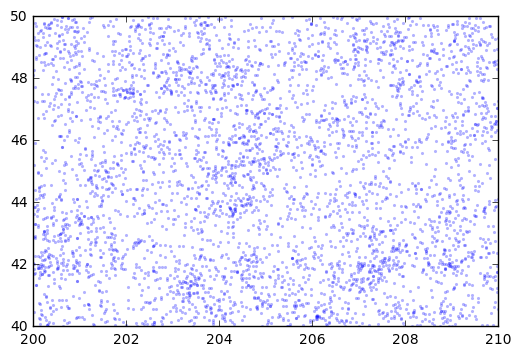

In [23]:
plt.scatter(cut2['RA'], cut2['DEC'], lw=0, alpha=0.3, s=5)
plt.xlim(ra_min, ra_max)
plt.ylim(dec_min, dec_max)
plt.show()

In [24]:
#can we assume distances to be linear if separation is only 10 degrees in ra and dec?
lrg_sep2 = relative_separation(cut2)

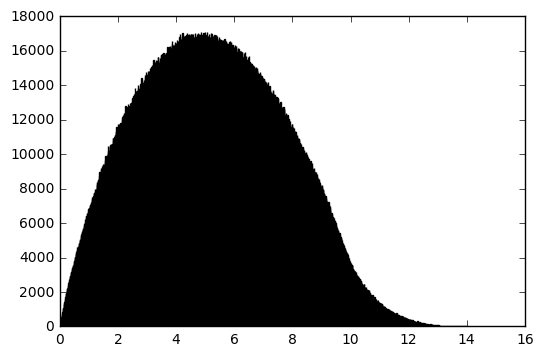

In [25]:
freq2, sep2, _ = plt.hist(lrg_sep2, bins=2000, range=(0,14))

## Calculate errors in LRG data and random data

In [19]:
lrg_err = np.sqrt(freq)
rand_err = np.sqrt(freq_seed)

#### Random error proportional to `sqrt(N)/N`

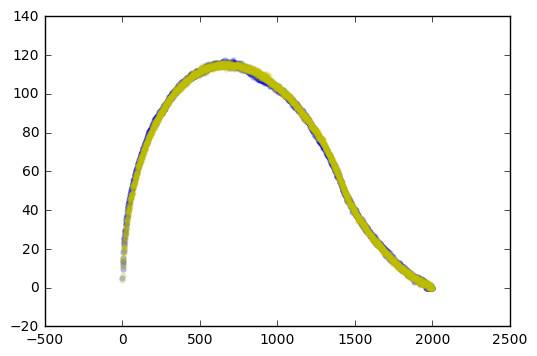

In [21]:
plt.scatter(range(2000), lrg_err, c='b', lw=0, alpha=0.3)
plt.scatter(range(2000), rand_err, c='y', lw=0, alpha=0.3)
plt.show()

## Propagate these errors when dividing LRG hist by random hist

In [22]:
div = freq/freq_seed
div_err = div*((lrg_err/freq)+(rand_err/freq_seed))

/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/belaabolfathi/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


### Plot ratio of LRG data and random data

In [23]:
print(np.all(sep == sep_seed))

True


In [24]:
midpt = (sep[:-1]+sep[1:])/2

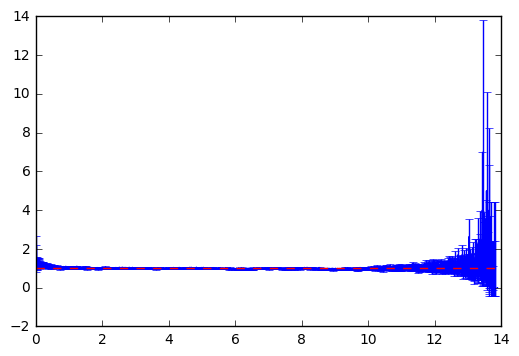

In [25]:
plt.errorbar(midpt, div, yerr = div_err)
plt.plot((0, 14), (1, 1), '--r')
#plt.ylim(-1,15)
#plt.xlim(12,14)
plt.show()